In [1]:
import pandas as pd
import matplotlib as plt
import os
from datetime import datetime

## Compile Data
### Read in all csv datafiles (2010-2020) and combine into a single dataframe 

In [2]:
dataDir = '../data/PollutionData/raw/'

df_raw = pd.DataFrame()
dataYears = range(2010,2021)

for year in dataYears:
    fileName = dataDir + 'daily_88101_' + str(year) + '.csv'
    temp = pd.read_csv(fileName)
    df_raw = df_raw.append(temp)

df_raw = df_raw.fillna(0)

In [3]:
df_data = df_raw.drop([
    'State Code',
    'County Code',
    'Site Num',
    'Parameter Code',
    'POC',
    'Datum',
    'Parameter Name',
    'Event Type',
    'Observation Count',
    'Observation Percent',
    'Method Code',
    'Method Name',
    'Date of Last Change'
], axis = 1)

df_data = df_data.loc[df_data['Sample Duration'] == '24 HOUR']

dateList = df_data['Date Local'].tolist()
yearList = []
weekList =[]

for date in dateList:
    dateFormatted = datetime.strptime(date, "%Y-%m-%d")
    yearList.append(dateFormatted.year)
    weekList.append(dateFormatted.isocalendar()[1])

df_data.insert(5,'Week',weekList)
df_data.insert(6,'Year',yearList)

In [4]:
df_filtered = df_data.drop([
    'Sample Duration',
    'Date Local',
    'Pollutant Standard',
    '1st Max Value',
    '1st Max Hour',
    'Address',
    'CBSA Name',
    'Local Site Name'
], axis = 1)

In [5]:
df_compressed = df_filtered.groupby(['Week', 
                       'Year',
                       'Latitude',
                       'Longitude',
                       'Units of Measure',
                       'State Name',
                       'County Name',
                       'City Name']).mean().reset_index()

df_compressed = df_compressed.rename(columns = {'Arithmetic Mean':'PM25'})

#df_compressed = df_compressed.loc[(df_compressed['City Name']=='Fairhope') &
#                                  (df_compressed['Year'] == 2010)]

## Plot Data
### Full Tabulated Data to be Plotted

In [6]:
df_compressed

,Week,Year,Latitude,Longitude,Units of Measure,State Name,County Name,City Name,PM25,AQI
0,1,2010,17.712474,-64.784868,Micrograms/cubic meter (LC),Virgin Islands,St Croix,Not in a city,2.400000,10.000000
1,1,2010,21.392833,-157.969126,Micrograms/cubic meter (LC),Hawaii,Honolulu,Pearl City,5.400000,23.000000
2,1,2010,25.471944,-80.482778,Micrograms/cubic meter (LC),Florida,Miami-Dade,Homestead,9.614286,40.142857
3,1,2010,25.794222,-80.215556,Micrograms/cubic meter (LC),Florida,Miami-Dade,Miami,10.000000,41.375000
4,1,2010,25.941944,-80.326389,Micrograms/cubic meter (LC),Florida,Miami-Dade,Palm Springs North,7.800000,33.000000
...,...,...,...,...,...,...,...,...,...,...
380214,53,2020,47.568236,-122.308628,Micrograms/cubic meter (LC),Washington,King,Seattle,10.300000,43.000000
380215,53,2020,61.534163,-149.031655,Micrograms/cubic meter (LC),Alaska,Matanuska-Susitna,Not in a city,7.100000,30.000000
380216,53,2020,64.762973,-147.310297,Micrograms/cubic meter (LC),Alaska,Fairbanks North Star,Not in a city,63.350000,155.000000
380217,53,2020,64.845690,-147.727413,Micrograms/cubic meter (LC),Alaska,Fairbanks North Star,Fairbanks,25.080000,78.400000


### Input Parameters

In [7]:
start_year = 2010
end_year = 2020

StateNames = ['Massachusetts']
#StateNames = ['Oregon']
CountyNames = []
CityNames = ['Boston']
#CityNames = ['Portland']

toPlot = 'State'
toPlot = 'County'
toPlot = 'City'

### Filtered Data to be Plotted

In [8]:
years = range(start_year, end_year+1)
df_plot = df_compressed

if StateNames:
    df_plot = df_plot.loc[(df_plot['State Name'].isin(StateNames))]
if CountyNames:
    df_plot = df_plot.loc[(df_plot['County Name'].isin(CountyNames))]
if CityNames:
    df_plot = df_plot.loc[(df_plot['City Name'].isin(CityNames))]

df_plot = df_plot.drop(['Latitude',
             'Longitude',
             'Units of Measure',
             'State Name',
             'County Name',
             'City Name'], axis=1)
    
df_plot = df_plot.groupby(['Year', 
                           'Week']).mean().reset_index()   

#set up x axis to plot 
year = df_plot['Year'].iloc[0]
week = df_plot['Week'].iloc[0]
startDate = datetime.fromisocalendar(year,week,1)
year = df_plot['Year'].iloc[-1]
week = df_plot['Week'].iloc[-1]
endDate = datetime.fromisocalendar(year,week,1)
timeSplit = len(df_plot)
indexValues = pd.date_range(start=startDate, end=endDate, periods=timeSplit)
df_plot = df_plot.set_index(indexValues)

### Plot Data

Text(0.5, 1.0, 'Emission Levels in Boston')

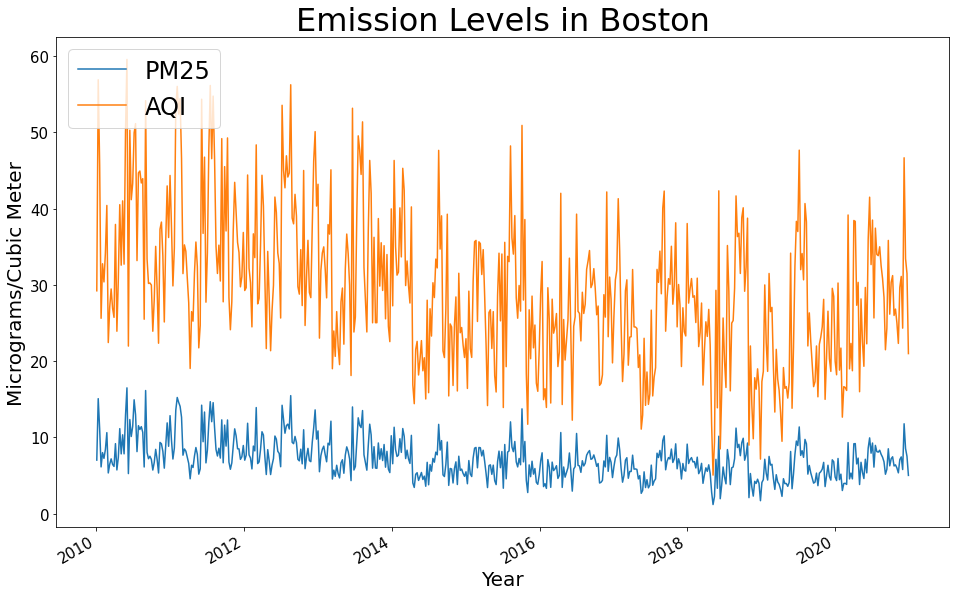

In [11]:
plt = df_plot.plot.line(y = ['PM25', 'AQI'], 
                         figsize = (16,10),
                         fontsize = 15
                         )

plt.legend(loc=2, prop={'size': 24})
plt.set_xlabel('Year', fontsize=20)
plt.set_ylabel('Micrograms/Cubic Meter', fontsize=20)
plt.set_title('Emission Levels in Boston', fontsize=32)


In [10]:
df_plot.tail(20)

,Year,Week,PM25,AQI
2020-08-15 02:48:12.743362816,2020,34,7.800000,32.500000
2020-08-22 05:10:56.283185856,2020,35,7.416667,30.833333
2020-08-29 07:33:39.823008832,2020,36,6.816667,28.388889
2020-09-05 09:56:23.362831872,2020,37,5.183333,21.500000
2020-09-12 12:19:06.902654912,2020,38,5.833333,24.333333
2020-09-19 14:41:50.442477888,2020,39,8.522222,35.833333
2020-09-26 17:04:33.982300928,2020,40,6.283333,26.166667
2020-10-03 19:27:17.522123904,2020,41,7.216667,30.333333
2020-10-10 21:50:01.061946944,2020,42,7.472222,31.222222
2020-10-18 00:12:44.601769920,2020,43,6.266667,26.000000
